<a href="https://colab.research.google.com/github/geetkarthi/Internshala-EDA-/blob/main/EDA_Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [ ]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['pickup_time'] = df['pickup_datetime'].dt.time
df['pickup_date'] = pd.to_datetime(df["pickup_datetime"]).dt.date
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

# Converting yes/no flag to 1 and 0
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

#df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

#duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
#duration_difference.shape

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time,pickup_date
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,16:40:21,2016-02-29
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,23:35:37,2016-03-11
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,17:59:33,2016-02-21
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,09:44:31,2016-01-05
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,06:42:23,2016-02-17


In [ ]:
x = df.drop(["trip_duration", "id", "pickup_datetime", "dropoff_datetime"], axis = 1)
y = df["trip_duration"]
x.shape, y.shape

((729322, 9), (729322,))

In [ ]:
def Seconds():
    for i in range (0, len(df)):
        a = df['pickup_time'][i]
        tmp = a.hour*3600 + a.minute*60 + a.second
        df['pickup_time'][i] = tmp
Seconds()

In [ ]:
def Date():
    for i in range (0, len(df)):
        dat = df['pickup_date'][i]
        d = dat.month
        df['pickup_date'][i] = d
Date()

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time,pickup_date
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,60021,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,84937,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,64773,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,35071,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,24143,2


In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
pickup_time                   object
pickup_date                   object
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.111111,0.856226,0.353352,0.856048,0.731696,0.0,0.694696,0.2
1,0.0,0.222222,0.855612,0.350606,0.855497,0.725202,0.0,0.983079,0.4
2,1.0,0.222222,0.855451,0.350007,0.856331,0.732015,0.0,0.749696,0.2
3,1.0,0.666667,0.856087,0.352236,0.856174,0.732502,0.0,0.405919,0.0
4,0.0,0.111111,0.855098,0.349251,0.855614,0.729095,0.0,0.279436,0.2


In [ ]:
x = pd.DataFrame(x_scaled)
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 61)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import mean_squared_error as mse

In [ ]:
def Elbow(K):
    test_error = []
    for i in K:
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        tmp = clf.predict(test_x)
        tmp = mse(tmp, test_y)
        test_error.append(tmp)
        
    return test_error

In [ ]:
k = range(1, 30)
test = Elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

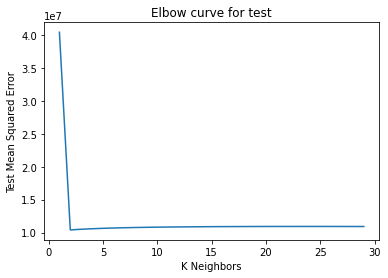

In [ ]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow curve for test')

In [ ]:
clf1 = KNN(n_neighbors = 4)
clf1.fit(train_x, train_y)
print(mse(clf1.predict(test_x), test_y))

10575128.536590047


In [ ]:
clf1 = KNN(n_neighbors = 5)
clf1.fit(train_x, train_y)
print(mse(clf1.predict(test_x), test_y))

10638062.713038376


In [ ]:
clf1 = KNN(n_neighbors = 3)
clf1.fit(train_x, train_y)
print(mse(clf1.predict(test_x), test_y))

10496014.789339168
